Inception Net

In [1]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
#percent_data = 1
#num_samples = int(len(train_images) * percent_data)
num_samples = 1000
train_images = train_images[:num_samples]
train_labels = train_labels[:num_samples]

print("Shapes of the loaded data:")
print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)

170498071/170498071 [==============================] - 13s 0us/step
Shapes of the loaded data:
Train images: (1000, 32, 32, 3)
Train labels: (1000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


In [2]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [3]:
from skimage.transform import resize
resized_train_images = np.array([resize(img, (75, 75)) for img in train_images])
resized_test_images = np.array([resize(img, (75, 75)) for img in test_images])

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
val_split = 0.2
val_size = int(val_split * len(resized_train_images))
val_images = resized_train_images[:val_size]
val_labels = train_labels[:val_size]
train_images = resized_train_images[val_size:]
train_labels = train_labels[val_size:]

In [6]:
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
validation_generator = test_datagen.flow(val_images, val_labels, batch_size=32)

In [7]:
def create_inception_model(include_top=False):
  base_model = InceptionV3(weights='imagenet', include_top=include_top, input_shape=(75, 75, 3))
  if not include_top:
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
  else:
    model = base_model
  return model

In [26]:
# Inception Model
inception_model = create_inception_model(include_top=False)

#Freeze base model layers for transfer learning
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/10
25/25 [==============================] - 33s 133ms/step - loss: 2.6579 - accuracy: 0.1425 - val_loss: 225.5591 - val_accuracy: 0.1050
Epoch 2/10
25/25 [==============================] - 3s 124ms/step - loss: 2.6567 - accuracy: 0.1400 - val_loss: 20228.2891 - val_accuracy: 0.1150
Epoch 3/10
25/25 [==============================] - 2s 81ms/step - loss: 2.5405 - accuracy: 0.1937 - val_loss: 94.5266 - val_accuracy: 0.0750
Epoch 4/10
25/25 [==============================] - 2s 79ms/step - loss: 2.4459 - accuracy: 0.2163 - val_loss: 1443.8938 - val_accuracy: 0.0750
Epoch 5/10
25/25 [==============================] - 2s 81ms/step - loss: 2.5358 - accuracy: 0.1562 - val_loss: 8.9876 - val_accuracy: 0.0900
Epoch 6/10
25/25 [==============================] - 2s 80ms/step - loss: 2.3734 - accuracy: 0.1750 - val_loss: 2.5860 - val_accuracy: 0.1050
Epoch 7/10
25/25 [==============================] - 2s 78ms/step - loss: 2.2424 - accuracy: 0.1988 - val_loss: 38.8305 - val_accuracy: 0.0900

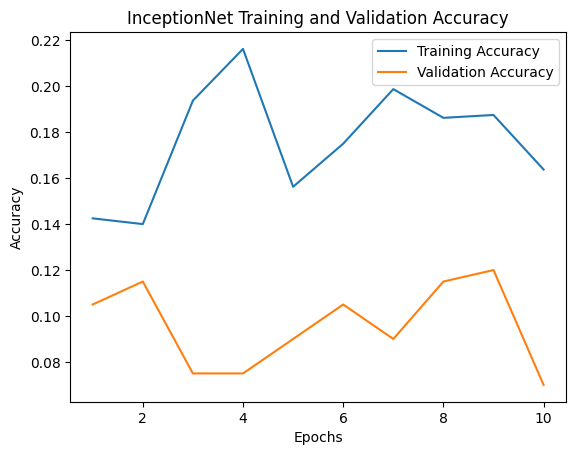

In [27]:
import matplotlib.pyplot as plt

# Train the model and record the training history
history = inception_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Extract training and validation accuracies from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracies
epochs_range = range(1, len(train_acc) + 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('InceptionNet Training and Validation Accuracy')
plt.legend()
plt.show()


In [28]:
test_loss, test_acc = inception_model.evaluate(test_datagen.flow(resized_test_images, test_labels, batch_size=32))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 [==============================] - 5s 16ms/step - loss: 2.2738 - accuracy: 0.0978
Test Loss: 2.2738122940063477
Test Accuracy: 0.09780000150203705


Dense Net

In [11]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3, DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model


In [12]:
def create_densenet_model(include_top=False):
  base_model = DenseNet121(weights='imagenet', include_top=include_top, input_shape=(75, 75, 3))
  if not include_top:
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # Add custom layers for classification (adjust units as needed) x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
  else:
    model = base_model
  return model

In [13]:
densenet_model = create_densenet_model(include_top=False)

29084464/29084464 [==============================] - 2s 0us/step


In [14]:
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
25/25 [==============================] - 3s 129ms/step - loss: 0.3640 - accuracy: 0.8900 - val_loss: 10.0283 - val_accuracy: 0.1100
Epoch 2/10
25/25 [==============================] - 3s 106ms/step - loss: 0.3305 - accuracy: 0.9000 - val_loss: 7.5028 - val_accuracy: 0.1100
Epoch 3/10
25/25 [==============================] - 4s 164ms/step - loss: 0.3324 - accuracy: 0.9087 - val_loss: 5.5767 - val_accuracy: 0.1500
Epoch 4/10
25/25 [==============================] - 4s 149ms/step - loss: 0.3145 - accuracy: 0.9075 - val_loss: 4.2542 - val_accuracy: 0.1300
Epoch 5/10
25/25 [==============================] - 3s 106ms/step - loss: 0.2414 - accuracy: 0.9250 - val_loss: 4.9849 - val_accuracy: 0.1100
Epoch 6/10
25/25 [==============================] - 3s 107ms/step - loss: 0.2143 - accuracy: 0.9325 - val_loss: 7.8766 - val_accuracy: 0.1100
Epoch 7/10
25/25 [==============================] - 3s 107ms/step - loss: 0.1821 - accuracy: 0.9350 - val_loss: 5.5810 - val_accuracy: 0.1100
Epoch

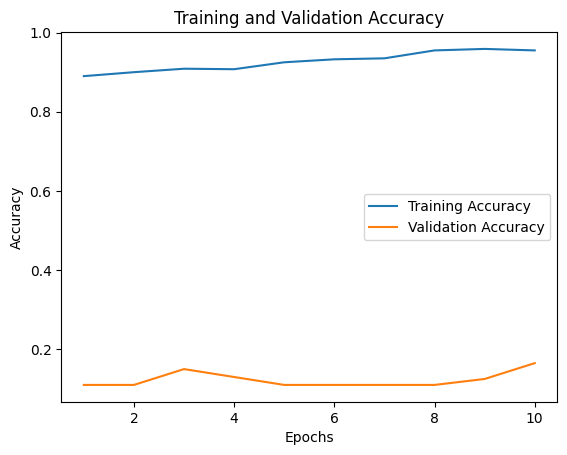

In [23]:
import matplotlib.pyplot as plt

# Train the model and record the training history
history = densenet_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Extract training and validation accuracies from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracies
epochs_range = range(1, len(train_acc) + 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('DenseNet - Training and Validation Accuracy')
plt.legend()
plt.show()


In [24]:
test_loss_densenet, test_acc_densenet = densenet_model.evaluate(test_datagen.flow(resized_test_images, test_labels, batch_size=32))

313/313 [==============================] - 7s 22ms/step - loss: 5.5162 - accuracy: 0.1500


In [25]:
print("DenseNet Model Test Loss:", test_loss_densenet)
print("DenseNet Model Test Accuracy:", test_acc_densenet)

DenseNet Model Test Loss: 5.516197204589844
DenseNet Model Test Accuracy: 0.15000000596046448
